cluster Analysis :         sepal length (cm)                     sepal width (cm)            \
                     mean  min  max       std             mean  min  max   
cluster                                                                    
0                5.006000  4.3  5.8  0.352490         3.428000  2.3  4.4   
1                5.833929  4.9  6.7  0.420941         2.676786  2.0  3.0   
2                6.806818  5.9  7.9  0.492454         3.120455  2.6  3.8   

                  petal length (cm)                     petal width (cm)       \
              std              mean  min  max       std             mean  min   
cluster                                                                         
0        0.379064          1.462000  1.0  1.9  0.173664         0.246000  0.1   
1        0.252256          4.421429  3.0  5.8  0.593515         1.435714  1.0   
2        0.246444          5.522727  4.4  6.9  0.650890         1.981818  1.4   

                        
         max

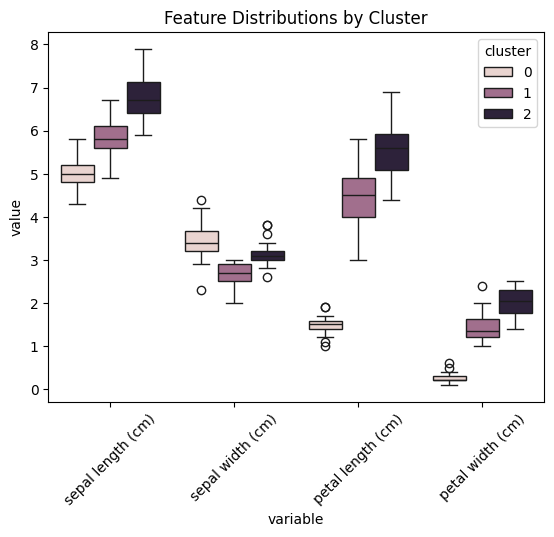

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

iris=load_iris()
x=iris.data
feature_names=iris.feature_names

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

kmeans=KMeans(n_clusters=3,init='k-means++')
clusters=kmeans.fit_predict(x_scaled)

df=pd.DataFrame(x,columns=feature_names)
df['cluster']=clusters

cluster_summary=df.groupby('cluster').agg(['mean','min','max','std'])
print("cluster Analysis :", cluster_summary)

true_label=iris.target
df['True_label']=true_label

comparison=pd.crosstab(df['cluster'],df['True_label'])
print("cluster vs True lable: ", comparison)

df_melted = df.melt(id_vars=['cluster'], value_vars=feature_names)
sns.boxplot(x='variable', y='value', hue='cluster', data=df_melted)
plt.xticks(rotation=45)
plt.title('Feature Distributions by Cluster')
plt.show()